# Quantum conductance and transport

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def DOS(E,gam,ep):
    return (gam/(2*np.pi))/((E-ep)**2 + (gam/2)**2)

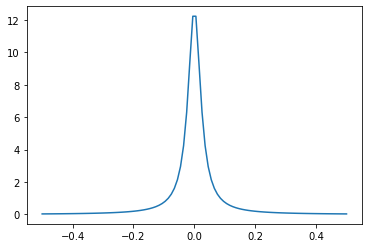

In [38]:
E = np.linspace(-0.5,0.5,100)
dE = E[1]-E[0]
D = DOS(E,0.05,0)
plt.plot(E,D)

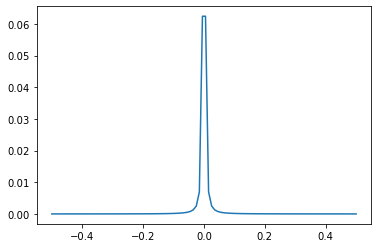

In [39]:
E = np.linspace(-0.5,0.5,100)
D = DOS(E,0.00001,0)
plt.plot(E,D)

## potential profile

In [40]:
# function defined
def potential(Vg,Vd,U0,delN,a,b):
    q = 1
    UL =(a)*(-q*Vg)+(b)*(-q*Vd)
    U = UL + U0*(delN)
    return U 

def fermi_dirac(E,mu,kbT):
    return 1/(1+np.exp((E-mu)/kbT))

def DOS(E,gam,ep):
    dE = E[1]-E[0]
    D = (gam/(2*np.pi))/((E-ep)**2 + (gam/2)**2)
    return D/(dE*(np.sum(D))) # normalizing to one

def number_of_electrons(U,gam1,gam2,mu1,mu2,kbT,ep):
    E = np.linspace(-1,1,501)
    dE = E[1]-E[0]
    gam = gam1 + gam2
    d = DOS(E-U,gam,ep)
    f1 = fermi_dirac(E,mu1,kbT)
    f2 = fermi_dirac(E,mu2,kbT)
    c = (gam1*f1 + gam2*f2)/(gam)
    N = np.sum(dE*d*c)
    return N

def current(U,gam1,gam2,mu1,mu2,kbT,ep):
    E = np.linspace(-1,1,501)
    dE = E[1]-E[0]
    d = DOS(E-U,gam1+gam2,ep)
    f1 = fermi_dirac(E,mu1,kbT)
    f2 = fermi_dirac(E,mu2,kbT)
    c = (gam1*gam2)/(gam1+gam2)
    q = 1.602e-19
    hbar = 1.055e-34    
    I = (q*q/hbar)*np.sum(dE*d*c*(f1-f2))
    return I

In [41]:
U0 = 0.025
Vd = 0
Vg = 0 
a = 1
b = 0.5
gam1 = gam2 = 0.005
mu1=0
mu2=mu1-Vd
ep = 0.2
kbT = 0.025

# arbitrary parameter 
Ui = 1 # initial guess for U
alpha = 0.99
V = np.linspace(0,1,100)
ele = []
curr = []

for i in range(0,len(V)):
    # bias
    Vd = V[i]
    mu1=0
    mu2=mu1-Vd
    N0 = 1 #number_of_electrons(ep,gam1,gam2,mu1,mu2,kbT,ep)
    
    # the self-consistency test
    while True:
        N = number_of_electrons(Ui,gam1,gam2,mu1,mu2,kbT,ep)
        delN = N-N0
        U_new = potential(Vg,Vd,U0,delN,a,b)
        if abs(U_new-Ui) < 0.00001:
            break
        Ui = Ui + alpha*(U_new-Ui)
    I = current(Ui,gam1,gam2,mu1,mu2,kbT,ep)
    ele.append(N)
    curr.append(I)

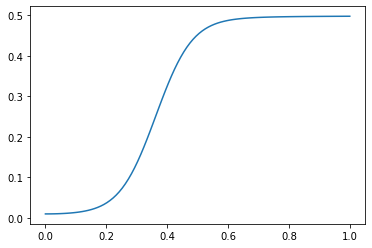

In [42]:
# electron vs voltage
plt.plot(V,ele)

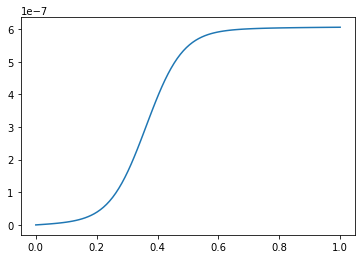

In [43]:
# current vs voltage
plt.plot(V,curr)

In [45]:
## coulomb blockade
E = np.linspace(-5,5,501)
D = 2*DOS(E,0.05,0)

In [46]:
U0 = 0.25
D = DOS(E-U0,0.05,0)
D2 = D + DOS(E+U0,0.05,0)

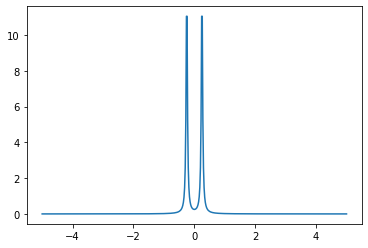

In [47]:
plt.plot(E,D2)

In [48]:
## E.1.3
def current(U,gam1,gam2,mu1,mu2,kbT1,kbT2,ep):
    E = np.linspace(-1,1,101)
    dE = E[1]-E[0]
    d = DOS(E-U,gam1+gam2,ep)
    f1 = fermi_dirac(E,mu1,kbT1)
    f2 = fermi_dirac(E,mu2,kbT2)
    c = (gam1*gam2)/(gam1+gam2)
    q = 1.602e-19
    hbar = 1.055e-34    
    I = 2*(q*q/hbar)*np.sum(dE*d*c*(f1-f2))
    return I

V = np.linspace(-0.25,0.25,101)
test  = []
for i in range(0,len(V)):
    mu1 = ep+V[i]
    I = current(0,0.05,0.05,mu1,mu1,0.026,0.025,0.2)
    test.append(I)

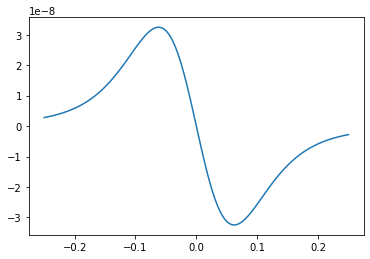

In [49]:
plt.plot(V,test)